In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import scipy as sp

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#표 한글, 음수표현 처리
import matplotlib
import matplotlib.font_manager as fm
font_location = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
matplotlib.rc('font',family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
# vscode) hide panel : ctrl + J

In [4]:
ABC = pd.read_excel('ppl_all_brand_category.xlsx')
AP = pd.read_excel('ppl_all_product.xlsx')


# PPL 데이터 분석
* 분포적 특성 검증 (정규분포, 2시그마 법칙)
* 시계열적 특성 분석 (이동평균선(5일,10일의 이격도))

---
---
# All Brand Category
'브랜드명'과'품목'으로 구성된 Dataframe

In [5]:
ABC.head()

,Unnamed: 0,아제린 미스트,알도 구두,라디안큐바이오 오일,프레드릭 콘스탄트 시계,루핏 티셔츠,클럽 모나코 자켓,아워글래스 하이라이터,캘빈클라인 가방,스케쳐스 운동화,...,예담(출판사) 서적,리타모니카 목걸이,티에르 귀걸이,티에르 귀걸이.1,쌤소나이트 캐리어,웻앤와일드 하이라이터,킵쿨 에센스,아디다스 팬츠,프론트로우 자켓,미카코 뷰티용품
0,0,0,63.10160,0,23.68421,0,74.57627,68.75,100.00000,79.46713,...,0,0,0.0,0,64.58546,44.82758,0,65.21739,70,0
1,1,0,65.77540,0,42.10526,0,84.74576,81.25,81.50684,92.64407,...,0,0,0.0,0,79.42681,44.82758,0,64.59627,100,0
2,2,0,88.77005,0,50.00000,0,81.35593,31.25,76.48401,79.00376,...,0,0,0.0,0,81.88331,41.37931,0,52.79503,100,0
3,3,0,82.88770,0,42.10526,0,62.71186,31.25,64.15525,74.22531,...,0,0,0.0,0,70.62436,65.51724,0,55.59006,86,0
4,4,0,88.77005,0,65.78947,0,64.40677,81.25,59.13242,70.22878,...,0,0,0.0,0,62.53838,100.00000,0,46.27329,80,0


In [8]:
ABC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Columns: 422 entries, Unnamed: 0 to 미카코 뷰티용품
dtypes: float64(298), int64(124)
memory usage: 201.2 KB


In [9]:
sum(ABC.isnull().sum())

0

---
### 분석을 위한 데이터 준비

In [10]:
# row별(423개) 평균 컬럼 추가

Row_mean = []
for i in range(0,len(ABC.index)):
    Row_mean.append(ABC.iloc[i].mean())
Row_mean = pd.DataFrame(Row_mean)
ABC['Row_mean'] = Row_mean

ABC.columns


Index(['Unnamed: 0', '아제린 미스트', '알도 구두', '라디안큐바이오 오일', '프레드릭 콘스탄트 시계',
       '루핏 티셔츠', '클럽 모나코 자켓', '아워글래스 하이라이터', '캘빈클라인 가방', '스케쳐스 운동화',
       ...
       '리타모니카 목걸이', '티에르 귀걸이', '티에르 귀걸이.1', '쌤소나이트 캐리어', '웻앤와일드 하이라이터',
       '킵쿨 에센스', '아디다스 팬츠', '프론트로우 자켓', '미카코 뷰티용품', 'Row_mean'],
      dtype='object', length=423)

In [11]:
# 이동평균선 제작('avg_5')
# ['Row_mean']의 5일간격(해당일 전5일) 평균치

avg_5 = []
for i in range(0,len(ABC['Row_mean'])):
    avg_5.append(ABC['Row_mean'][i-5:i].mean())
avg_5 = pd.DataFrame(avg_5)
avg_5.head(10)
ABC['avg_5'] = avg_5

ABC.columns

Index(['Unnamed: 0', '아제린 미스트', '알도 구두', '라디안큐바이오 오일', '프레드릭 콘스탄트 시계',
       '루핏 티셔츠', '클럽 모나코 자켓', '아워글래스 하이라이터', '캘빈클라인 가방', '스케쳐스 운동화',
       ...
       '티에르 귀걸이', '티에르 귀걸이.1', '쌤소나이트 캐리어', '웻앤와일드 하이라이터', '킵쿨 에센스', '아디다스 팬츠',
       '프론트로우 자켓', '미카코 뷰티용품', 'Row_mean', 'avg_5'],
      dtype='object', length=424)

In [12]:
# 이동평균선 제작('avg_10')
# ['Row_mean']의 10일간격(해당일 전후5일) 평균치

avg_10 = []
for i in range(0,len(ABC['Row_mean'])):
    avg_10.append(ABC['Row_mean'][i-5:i+5].mean())
avg_10 = pd.DataFrame(avg_10)
avg_10.head(10)
ABC['avg_10'] = avg_10
ABC['avg_10'][56:61] = np.nan

ABC.columns

Index(['Unnamed: 0', '아제린 미스트', '알도 구두', '라디안큐바이오 오일', '프레드릭 콘스탄트 시계',
       '루핏 티셔츠', '클럽 모나코 자켓', '아워글래스 하이라이터', '캘빈클라인 가방', '스케쳐스 운동화',
       ...
       '티에르 귀걸이.1', '쌤소나이트 캐리어', '웻앤와일드 하이라이터', '킵쿨 에센스', '아디다스 팬츠',
       '프론트로우 자켓', '미카코 뷰티용품', 'Row_mean', 'avg_5', 'avg_10'],
      dtype='object', length=425)

In [13]:
# 방영일자(0~60)을 (-30~0~30) 으로 변경
ABC.index = np.arange(-30,31)
ABC.head()

# DB에서 불러올 시 삭제할 수 있는 셀.

,Unnamed: 0,아제린 미스트,알도 구두,라디안큐바이오 오일,프레드릭 콘스탄트 시계,루핏 티셔츠,클럽 모나코 자켓,아워글래스 하이라이터,캘빈클라인 가방,스케쳐스 운동화,...,티에르 귀걸이.1,쌤소나이트 캐리어,웻앤와일드 하이라이터,킵쿨 에센스,아디다스 팬츠,프론트로우 자켓,미카코 뷰티용품,Row_mean,avg_5,avg_10
-30,0,0,63.10160,0,23.68421,0,74.57627,68.75,100.00000,79.46713,...,0,64.58546,44.82758,0,65.21739,70,0,35.009665,NaN,NaN
-29,1,0,65.77540,0,42.10526,0,84.74576,81.25,81.50684,92.64407,...,0,79.42681,44.82758,0,64.59627,100,0,36.486401,NaN,NaN
-28,2,0,88.77005,0,50.00000,0,81.35593,31.25,76.48401,79.00376,...,0,81.88331,41.37931,0,52.79503,100,0,34.596006,NaN,NaN
-27,3,0,82.88770,0,42.10526,0,62.71186,31.25,64.15525,74.22531,...,0,70.62436,65.51724,0,55.59006,86,0,33.240793,NaN,NaN
-26,4,0,88.77005,0,65.78947,0,64.40677,81.25,59.13242,70.22878,...,0,62.53838,100.00000,0,46.27329,80,0,34.049356,NaN,NaN


---
## 데이터 분포 확인

'Row_mean'의 정규분포를 확인.  
중심극한정리에 의해, 'Row_mean'은 정규분포를 가질 것으로 예측

---
### 분포 검증 (히스토그램, 커널밀도추정, 정규분포)

(array([ 5.,  7.,  7., 11.,  9.,  5.,  4.,  7.,  5.,  1.]),
 array([25.70715498, 26.78507961, 27.86300425, 28.94092888, 30.01885352,
        31.09677815, 32.17470279, 33.25262742, 34.33055206, 35.40847669,
        36.48640133]),
 <a list of 10 Patch objects>)

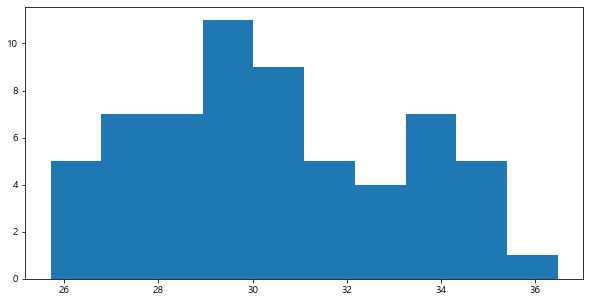

In [14]:
# ABC의 histogram

plt.figure(figsize=(10, 5))
plt.hist(ABC['Row_mean'],histtype='bar')

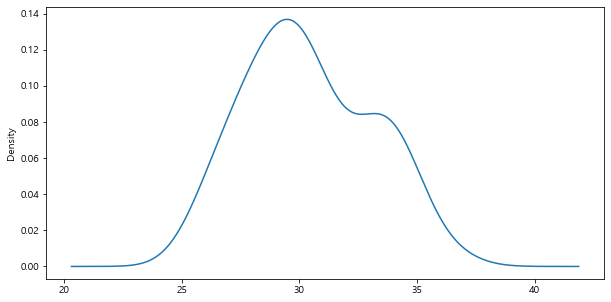

In [15]:
# ABC의 커널밀도추정(KDE, Kernel Density Estimation)

plt.figure(figsize=(10, 5)) 

ABC['Row_mean'].plot.kde()
plt.show()

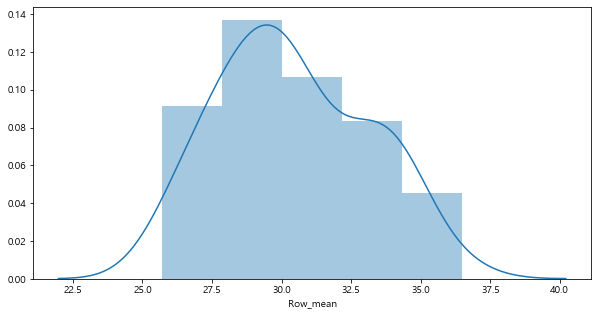

In [16]:
# 'Row_mean'의 distplot

plt.figure(figsize=(10, 5))

sns.distplot(ABC['Row_mean'],kde=True)

21.980702800185178

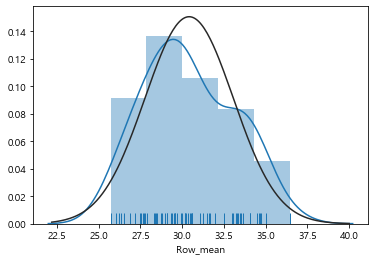

In [17]:
sns.distplot(ABC['Row_mean'],kde=True,fit = stats.norm,rug=True).get_lines()[0].get_data()[0].min()

In [18]:
# 'Row_mean'의 kde와 해당 범위의 정규분포를 비교하는 함수
def KDE_NORM_LOC_PPL(Series, KDELoc, NORMLoc):
    plt.figure(figsize=(10, 5))
    DISTPLOT = sns.distplot(Series,kde=True,fit = stats.norm,rug=True)

    plt.annotate('KDE',
                xy =(DISTPLOT.get_lines()[0].get_data()[0][KDELoc],DISTPLOT.get_lines()[0].get_data()[1][KDELoc]),
                xytext=(DISTPLOT.get_lines()[0].get_data()[0].min(),0.10),
                arrowprops={'facecolor' : 'red'},
                ha = 'center')
    plt.annotate('NORM',
                xy =(DISTPLOT.get_lines()[1].get_data()[0][NORMLoc],DISTPLOT.get_lines()[1].get_data()[1][NORMLoc]),
                xytext=(DISTPLOT.get_lines()[0].get_data()[0].max(),0.10),
                arrowprops={'facecolor' : 'yellow'},
                ha = 'center')
    plt.show()
    print("KDE : "+str(KDELoc)+" / NORM : "+str(NORMLoc))
    print("-KDE-")
    print("X : "+str(DISTPLOT.get_lines()[0].get_data()[0][KDELoc]))
    print("Y : "+str(DISTPLOT.get_lines()[0].get_data()[1][KDELoc]))
    print("-NORM-")
    print("X : "+str(DISTPLOT.get_lines()[1].get_data()[0][NORMLoc]))
    print("Y : "+str(DISTPLOT.get_lines()[1].get_data()[1][NORMLoc]))
    print("\n")
    if DISTPLOT.get_lines()[0].get_data()[1][KDELoc] > DISTPLOT.get_lines()[1].get_data()[1][NORMLoc]:
        print("KDE가 높음")
    elif DISTPLOT.get_lines()[0].get_data()[1][KDELoc] < DISTPLOT.get_lines()[1].get_data()[1][NORMLoc]:
        print("NORM이 높음")
    elif DISTPLOT.get_lines()[0].get_data()[1][KDELoc] == DISTPLOT.get_lines()[1].get_data()[1][NORMLoc]:
        print("같음")

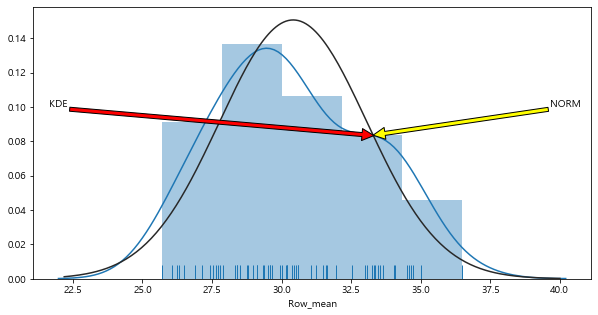

KDE : 79 / NORM : 124
-KDE-
X : 33.32196189886888
Y : 0.0833772856802158
-NORM-
X : 33.29031947879569
Y : 0.08364092043697212


NORM이 높음


In [19]:
KDE_NORM_LOC_PPL(ABC['Row_mean'],79,124)
## 1. KDE랑 NORM을 같이 비교할 수가 없음(컬럼길이의 차이 (128,200))

## 2. 파라미터를 변경하며 눈으로 측정
# KDE가 NORM을 벗어나는 범위
# 15부터49(34)[15,24] / 79부터120(51)[79, 124]
# 정규분포 밖 kde - 0.008~0.131 / 0.083~0.0005

## 3. 벗어나는 값이 있긴 하지만 대부분 정규분포에 가까운 분포
# 중심극한정리 : 동일한 확률분포를 가진 독립 확률 변수 n개의 평균의 분포는 n이 적당히 크다면 정규분포에 가까워진다는 정리
# [출처] - https://m.blog.naver.com/PostView.nhn?blogId=parksehoon1971&logNo=221585313064&proxyReferer=https:%2F%2Fwww.google.com%2F


---
### boxplot

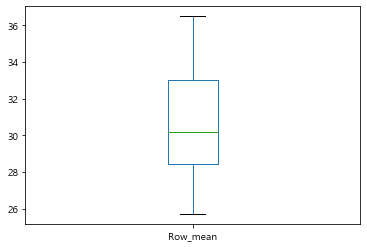

In [20]:
# 'Row_mean'의 boxplot

ABC['Row_mean'].plot(kind='box')

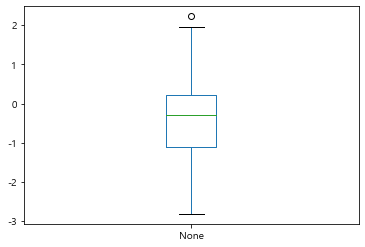

In [21]:
# 'Row_mean' - 'avg_5' 의 boxplot

(ABC['Row_mean'] - ABC['avg_5']).plot(kind='box')

# 이상치(방영일)의 발견

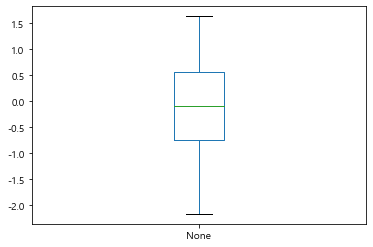

In [22]:
# 'Row_mean' - 'avg_10' 의 boxplot

(ABC['Row_mean'] - ABC['avg_10']).plot(kind='box')

---
## 표준편차(2시그마, 3시그마)와의 비교)
* 2시그마의 법칙  
임의의 표본이 (평균 + (2 \* 표준편차))와 (평균 - (2 \* 표준편차)) 사이에 해당할 확률은 95%이다.

In [23]:
ABC['Row_mean'].describe()

count    61.000000
mean     30.417727
std       2.668974
min      25.707155
25%      28.409523
50%      30.157587
75%      33.012111
max      36.486401
Name: Row_mean, dtype: float64

In [24]:
max_2sigma = ABC['Row_mean'].mean() + (2*ABC['Row_mean'].std())
min_2sigma = ABC['Row_mean'].mean() - (2*ABC['Row_mean'].std())

In [25]:
# 'Row_mean' 중 2sigma를 넘지 않는 비율
(ABC['Row_mean'] > max_2sigma).value_counts()

False    60
True      1
Name: Row_mean, dtype: int64

In [26]:
100 - 1/60

# 99.98%

99.98333333333333

In [27]:
# 'Row_mean' 중 -2sigma를 넘는 비율
(ABC['Row_mean'] < min_2sigma).value_counts()

False    61
Name: Row_mean, dtype: int64

In [28]:
# 100%

---
## 이동평균선(이격도)과의 차이

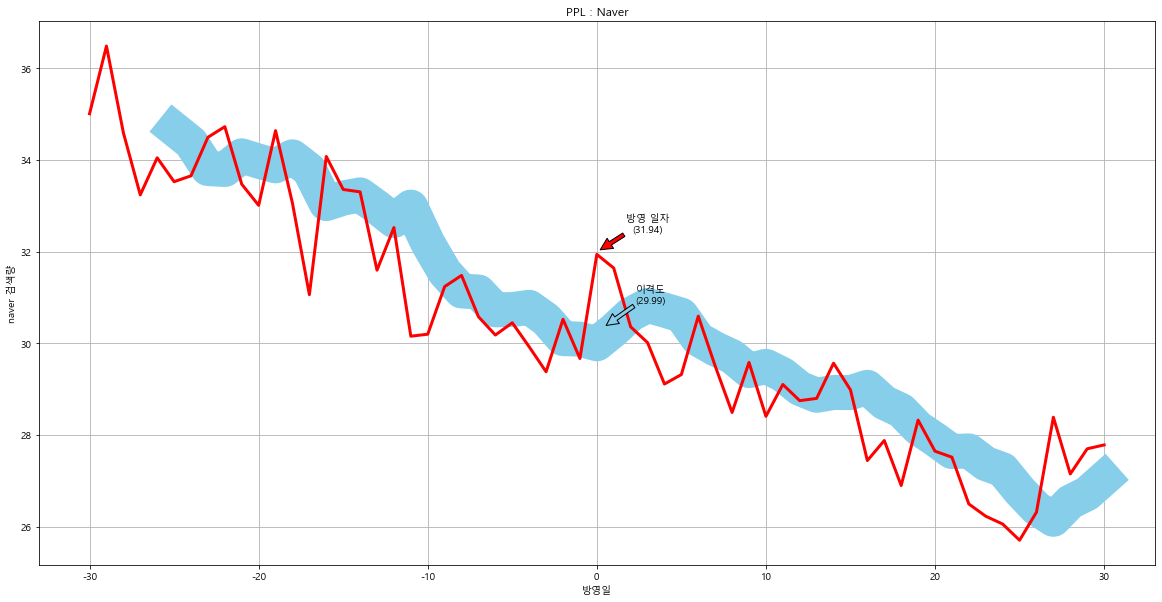

In [29]:
# avg_5


# plot 출력
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)


plt.plot(ABC['Row_mean'])
ax.plot(ABC.index, ABC['avg_5'],linewidth=35,color='skyblue')
ax.plot(ABC.index, ABC['Row_mean'],linewidth=3,color='red')
plt.xlabel('방영일')
plt.ylabel('naver 검색량')
plt.title('PPL : Naver')
# annot : 'Row_mean'
plt.annotate('방영 일자'+'\n'+'('+str('%.2f' % ABC['Row_mean'][0])+')',
            xy = (0+0.2, ABC['Row_mean'][0]+0.1),
            xytext = (0+3, ABC['Row_mean'][0]+0.5),
            ha = 'center',
            arrowprops={'facecolor' : 'red'}
            )
# annot : 'avg_5'
plt.annotate('이격도'+'\n'+'('+str('%.2f' % ABC['avg_5'][0])+')',
            xy = (0+0.55, ABC['avg_5'][0]+0.4),
            xytext = (0+3.2, ABC['avg_5'][0]+0.9),
            ha = 'center',
            arrowprops={'facecolor' : 'skyblue'}
            )
plt.grid(True)

plt.show()

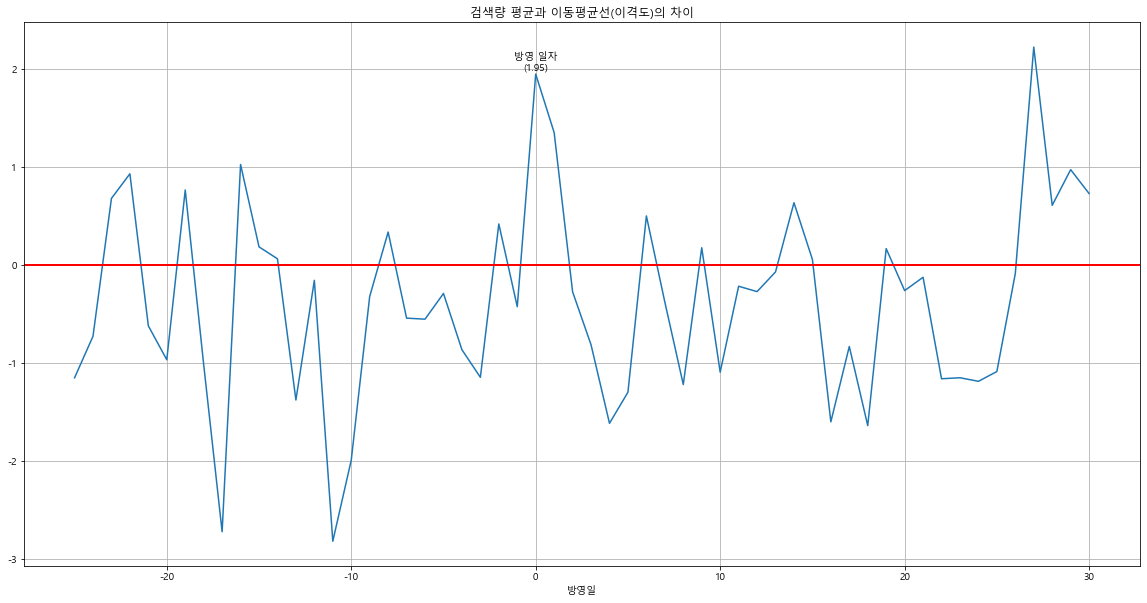

In [30]:
# avg_5


# 평균과 이동평균선의 차이
M_A = ABC['Row_mean'] - ABC['avg_5']

plt.figure(figsize=(20,10))
plt.title('검색량 평균과 이동평균선(이격도)의 차이')

plt.plot(ABC['Row_mean'] - ABC['avg_5'])
plt.axhline(y=0, color='r', linewidth=2)

plt.xlabel('방영일')
plt.annotate('방영 일자'+'\n'+'('+str('%.2f' % M_A[0])+')',
            xy =(0,M_A[0]+0.04),
            ha = 'center')

plt.grid(True)

plt.show()

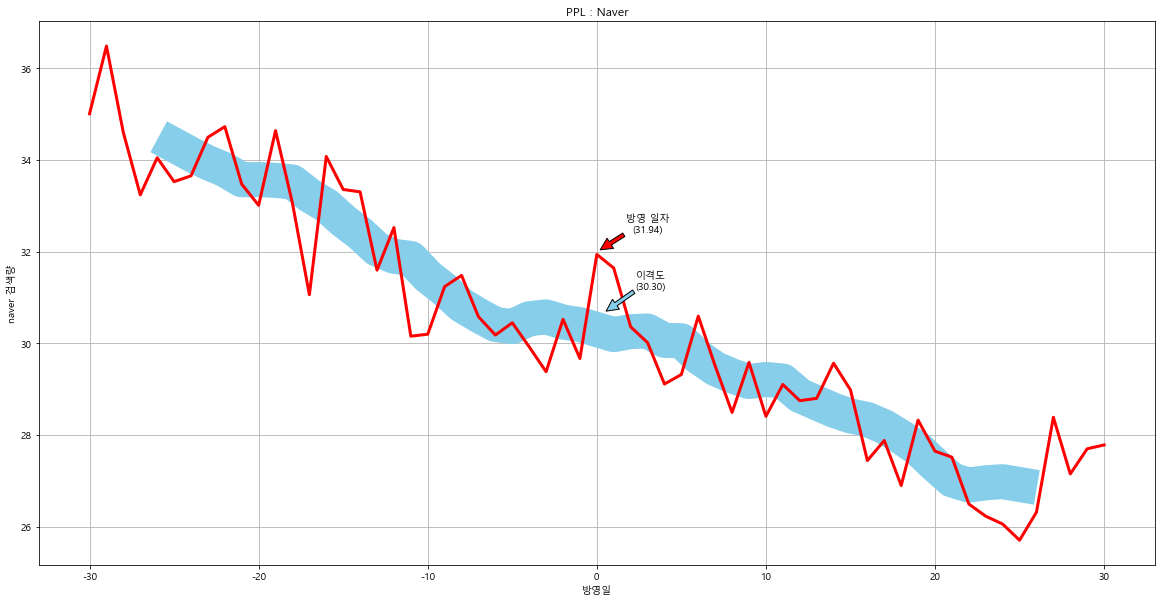

In [31]:
# avg_10


# plot 출력
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)


plt.plot(ABC['Row_mean'])
ax.plot(ABC.index, ABC['avg_10'],linewidth=35,color='skyblue')
ax.plot(ABC.index, ABC['Row_mean'],linewidth=3,color='red')
plt.xlabel('방영일')
plt.ylabel('naver 검색량')
plt.title('PPL : Naver')
# annot : 'Row_mean'
plt.annotate('방영 일자'+'\n'+'('+str('%.2f' % ABC['Row_mean'][0])+')',
            xy = (0+0.2, ABC['Row_mean'][0]+0.1),
            xytext = (0+3, ABC['Row_mean'][0]+0.5),
            ha = 'center',
            arrowprops={'facecolor' : 'red'}
            )
# annot : 'avg_10'
plt.annotate('이격도'+'\n'+'('+str('%.2f' % ABC['avg_10'][0])+')',
            xy = (0+0.55, ABC['avg_10'][0]+0.4),
            xytext = (0+3.2, ABC['avg_10'][0]+0.9),
            ha = 'center',
            arrowprops={'facecolor' : 'skyblue'}
            )
plt.grid(True)

plt.show()

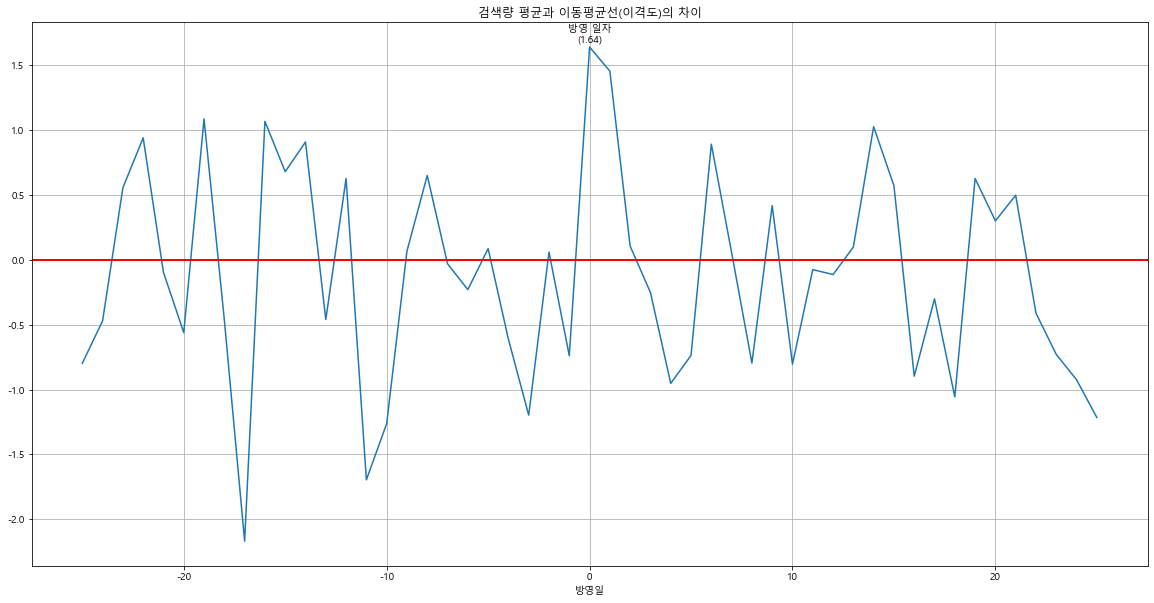

In [32]:
# avg_10


# 평균과 이동평균선의 차이
M_A = ABC['Row_mean'] - ABC['avg_10']

plt.figure(figsize=(20,10))
plt.title('검색량 평균과 이동평균선(이격도)의 차이')

plt.plot(ABC['Row_mean'] - ABC['avg_10'])
plt.axhline(y=0, color='r', linewidth=2)

plt.xlabel('방영일')
plt.annotate('방영 일자'+'\n'+'('+str('%.2f' % M_A[0])+')',
            xy =(0,M_A[0]+0.04),
            ha = 'center')

plt.grid(True)

plt.show()

In [56]:
max_2sigma = ABC['Row_mean'].mean() + (2*ABC['Row_mean'].std())
min_2sigma = ABC['Row_mean'].mean() - (2*ABC['Row_mean'].std())

In [57]:
# 'Row_mean' 중 2sigma를 넘지 않는 비율
(ABC['Row_mean'] > max_2sigma).value_counts()

False    60
True      1
Name: Row_mean, dtype: int64

In [58]:
max_3sigma = ABC['Row_mean'].mean() + (3*ABC['Row_mean'].std())

In [59]:
# 'Row_mean' 중 3sigma를 넘지 않는 비율
(ABC['Row_mean'] > max_3sigma).value_counts()

False    61
Name: Row_mean, dtype: int64

In [33]:
# M_A.mean()
M_A[1]


1.4528671943128124

---
# 결론 ( 브랜드명 & 품목 ) ★★★★★★ 수정필요 (avg_5,avg_10)
    
분석결과, 간접광고(PPL)는 Naver의 검색량에 영향을 주었다.  
영향 측정은 간접광고 방영 30일전, 당일, 30일후로 나누어  
모든 품목들의 해당일자의 '평균치(['Row_mean'])'를 만들었고,  
'평균치'가 유의미한지 추세를 제공하는지 알아보기 위해 '이동평균선(['avg_5'],['avg_10'])'을 사용하였다.  
이동평균선의 '이격도'는 '평균치'의 5일(x-5), 10일(x-5,x+5)간의 평균으로 제작하였다.  
  
단위기간 평균치와 추세선의 차(['Row_mean']-['avg_10'])에서  
방영 당일에 가장 높은 값(1.64)을 보였다.  
  
  
 위의 분석을 통해서  
'간접광고'는  
'Naver검색량(브랜드명+품목)'에 영향이 있음을 알 수 있다.


---
---

---
---
# All Product(name)
'상품명'으로만 구성된 Dataframe

In [34]:
AP.head()

,Unnamed: 0,black dot E,overlay panel shirt (beige),스무스 리퀴드 아이라이너 브라운,[Drama Signature] Slim Bootcut Trousers_2colors,웨이스트 다트 재킷,네이비 스트라이프 v넥 트임 셔츠,스타착용 자켓 HKS29K7,단델리온,711 아시아 스키니 앵클 쿨진,...,Vertical space sweatshirt _ beige,매직 컨투어링 하이라이터,새틴 하이라이터 이탈프리즘,B.Intl Division Jacket,자켓 PKM39K2,Oversized hoodie zip up jumper,비엠비코 퀸79노블 골드세럼,데일리 아이마스크 장미향,보더 믹스 롱블라우스,3포켓 숏 퀼팅 점퍼 루즈핏
0,0,0,0,0,0,0,0,0,79.69543,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,91.37055,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,94.41624,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,67.00507,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,76.14213,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
AP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Columns: 470 entries, Unnamed: 0 to 3포켓 숏 퀼팅 점퍼 루즈핏
dtypes: float64(64), int64(406)
memory usage: 224.1 KB


In [36]:
sum(AP.isnull().sum())

0

---
### 분석을 위한 데이터 준비

In [37]:
# row별(471개) 평균 컬럼 추가

Row_mean = []
for i in range(0,len(AP.index)):
    Row_mean.append(AP.iloc[i].mean())
Row_mean = pd.DataFrame(Row_mean)
AP['Row_mean'] = Row_mean
AP.columns


Index(['Unnamed: 0', 'black dot E', 'overlay panel shirt (beige)',
       '스무스 리퀴드 아이라이너 브라운', '[Drama Signature] Slim Bootcut Trousers_2colors',
       '웨이스트 다트 재킷', '네이비 스트라이프 v넥 트임 셔츠', '스타착용 자켓 HKS29K7', '단델리온 ',
       '711 아시아 스키니 앵클 쿨진',
       ...
       '매직 컨투어링 하이라이터', '새틴 하이라이터 이탈프리즘', 'B.Intl Division Jacket',
       '자켓 PKM39K2', 'Oversized hoodie zip up jumper', '비엠비코 퀸79노블 골드세럼',
       '데일리 아이마스크 장미향', '보더 믹스 롱블라우스', '3포켓 숏 퀼팅 점퍼 루즈핏', 'Row_mean'],
      dtype='object', length=471)

In [38]:
# 이동평균선 제작 ('avg_5')
# ['Row_mean']의 5일간격(해당일 전5일) 평균치

avg_5 = []
for i in range(0,len(AP['Row_mean'])):
    avg_5.append(AP['Row_mean'][i-5:i].mean())
avg_5 = pd.DataFrame(avg_5)
avg_5
AP['avg_5'] = avg_5
AP.columns

Index(['Unnamed: 0', 'black dot E', 'overlay panel shirt (beige)',
       '스무스 리퀴드 아이라이너 브라운', '[Drama Signature] Slim Bootcut Trousers_2colors',
       '웨이스트 다트 재킷', '네이비 스트라이프 v넥 트임 셔츠', '스타착용 자켓 HKS29K7', '단델리온 ',
       '711 아시아 스키니 앵클 쿨진',
       ...
       '새틴 하이라이터 이탈프리즘', 'B.Intl Division Jacket', '자켓 PKM39K2',
       'Oversized hoodie zip up jumper', '비엠비코 퀸79노블 골드세럼', '데일리 아이마스크 장미향',
       '보더 믹스 롱블라우스', '3포켓 숏 퀼팅 점퍼 루즈핏', 'Row_mean', 'avg_5'],
      dtype='object', length=472)

In [39]:
# 이동평균선 제작('avg_10')
# ['Row_mean']의 10일간격(해당일 전후5일) 평균치

avg_10 = []
for i in range(0,len(AP['Row_mean'])):
    avg_10.append(AP['Row_mean'][i-5:i+5].mean())
avg_10 = pd.DataFrame(avg_10)
avg_10.head(10)
AP['avg_10'] = avg_10
AP['avg_10'][56:61] = np.nan

AP.columns

Index(['Unnamed: 0', 'black dot E', 'overlay panel shirt (beige)',
       '스무스 리퀴드 아이라이너 브라운', '[Drama Signature] Slim Bootcut Trousers_2colors',
       '웨이스트 다트 재킷', '네이비 스트라이프 v넥 트임 셔츠', '스타착용 자켓 HKS29K7', '단델리온 ',
       '711 아시아 스키니 앵클 쿨진',
       ...
       'B.Intl Division Jacket', '자켓 PKM39K2',
       'Oversized hoodie zip up jumper', '비엠비코 퀸79노블 골드세럼', '데일리 아이마스크 장미향',
       '보더 믹스 롱블라우스', '3포켓 숏 퀼팅 점퍼 루즈핏', 'Row_mean', 'avg_5', 'avg_10'],
      dtype='object', length=473)

In [40]:
# 방영일자(0~60)을 (-30~0~30) 으로 변경
AP.index = np.arange(-30,31)
AP.head()

,Unnamed: 0,black dot E,overlay panel shirt (beige),스무스 리퀴드 아이라이너 브라운,[Drama Signature] Slim Bootcut Trousers_2colors,웨이스트 다트 재킷,네이비 스트라이프 v넥 트임 셔츠,스타착용 자켓 HKS29K7,단델리온,711 아시아 스키니 앵클 쿨진,...,B.Intl Division Jacket,자켓 PKM39K2,Oversized hoodie zip up jumper,비엠비코 퀸79노블 골드세럼,데일리 아이마스크 장미향,보더 믹스 롱블라우스,3포켓 숏 퀼팅 점퍼 루즈핏,Row_mean,avg_5,avg_10
-30,0,0,0,0,0,0,0,0,79.69543,0,...,0,0,0,0,0,0,0,4.437738,NaN,NaN
-29,1,0,0,0,0,0,0,0,91.37055,0,...,0,0,0,0,0,0,0,4.658061,NaN,NaN
-28,2,0,0,0,0,0,0,0,94.41624,0,...,0,0,0,0,0,0,0,5.301240,NaN,NaN
-27,3,0,0,0,0,0,0,0,67.00507,0,...,0,0,0,0,0,0,0,4.360117,NaN,NaN
-26,4,0,0,0,0,0,0,0,76.14213,0,...,0,0,0,0,0,0,0,4.932616,NaN,NaN


---
## 데이터 분포 확인

['Row_mean']의 정규분포를 확인.  
중심극한정리에 의해, ['Row_mean']은 정규분포를 가질 것으로 예측

---
### 분포 검증 (히스토그램, 커널밀도추정, 정규분포)

(array([ 8.,  8.,  9.,  6., 11.,  9.,  7.,  1.,  1.,  1.]),
 array([3.32759587, 3.52496032, 3.72232477, 3.91968922, 4.11705367,
        4.31441812, 4.51178257, 4.70914701, 4.90651146, 5.10387591,
        5.30124036]),
 <a list of 10 Patch objects>)

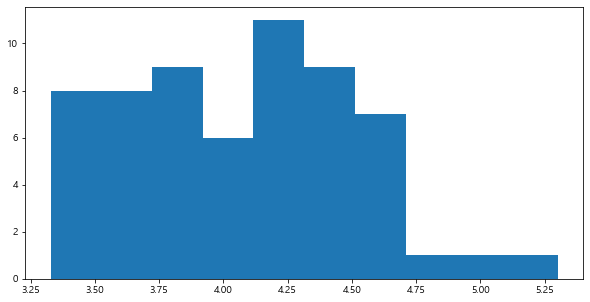

In [41]:
# AP의 histogram

plt.figure(figsize=(10, 5))
plt.hist(AP['Row_mean'],histtype='bar')

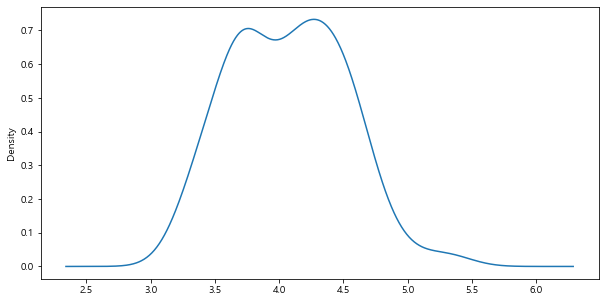

In [42]:
# AP의 커널밀도추정(KDE, Kernel Density Estimation)

plt.figure(figsize=(10, 5)) 

AP['Row_mean'].plot.kde()
plt.show()

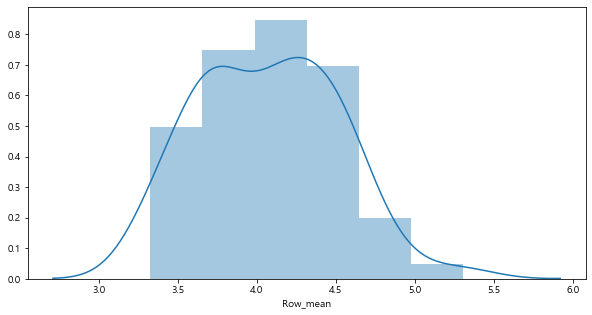

In [43]:
# 'Row_mean'의 distplot

plt.figure(figsize=(10, 5))

sns.distplot(AP['Row_mean'],kde=True)

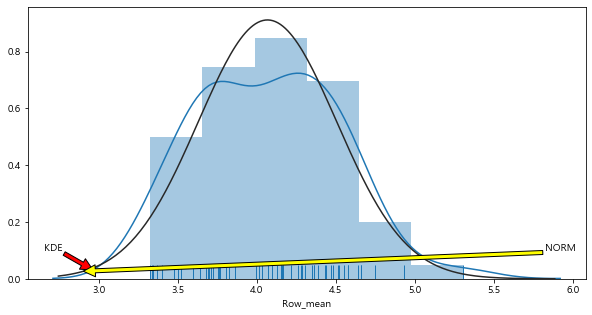

KDE : 10 / NORM : 10
-KDE-
X : 2.9641469701820795
Y : 0.03134453136315468
-NORM-
X : 2.9036928128559856
Y : 0.0264922113180882


KDE가 높음


In [44]:
KDE_NORM_LOC_PPL(AP['Row_mean'],10,10)

정규분포에 근사한 분포

---
### boxplot

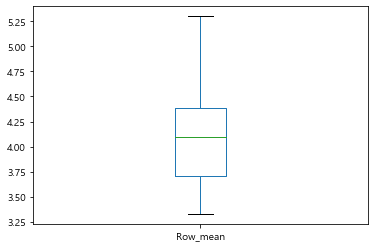

In [45]:
# 'Row_mean'의 boxplot

AP['Row_mean'].plot(kind='box')

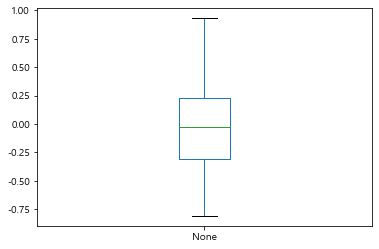

In [46]:
# 'Row_mean' - 'avg_5' 의 boxplot

(AP['Row_mean'] - AP['avg_5']).plot(kind='box')

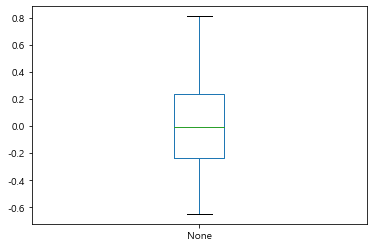

In [47]:
# 'Row_mean' - 'avg_10' 의 boxplot

(AP['Row_mean'] - AP['avg_10']).plot(kind='box')

---
## 표준편차(2시그마, 3시그마)와의 비교)
* 2시그마의 법칙  
임의의 표본이 (평균 + (2 \* 표준편차))와 (평균 - (2 \* 표준편차)) 사이에 해당할 확률은 95%이다.

In [48]:
AP['Row_mean'].describe()

count    61.000000
mean      4.067459
std       0.441076
min       3.327596
25%       3.708944
50%       4.098572
75%       4.386638
max       5.301240
Name: Row_mean, dtype: float64

In [49]:
max_2sigma = AP['Row_mean'].mean() + (2*AP['Row_mean'].std())
min_2sigma = AP['Row_mean'].mean() - (2*AP['Row_mean'].std())

In [50]:
# 'Row_mean' 중 2sigma를 넘지 않는 비율
(AP['Row_mean'] > max_2sigma).value_counts()
# 100 - 1/60
# 99.98%

False    60
True      1
Name: Row_mean, dtype: int64

In [51]:
# 'Row_mean' 중 -2sigma를 넘는 비율
(AP['Row_mean'] < min_2sigma).value_counts()
# 100%

False    61
Name: Row_mean, dtype: int64

---
## 이동평균선(이격도)과의 차이

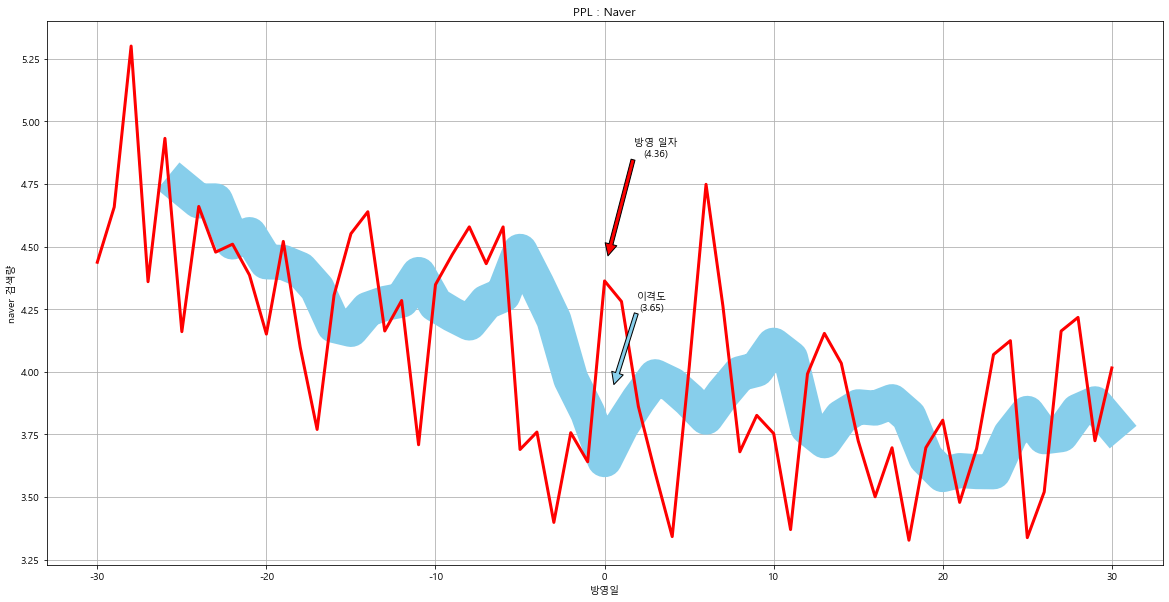

In [52]:
# avg_5


# plot 출력

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)


plt.plot(AP['Row_mean'])
ax.plot(AP.index, AP['avg_5'],linewidth=35,color='skyblue')
ax.plot(AP.index, AP['Row_mean'],linewidth=3,color='red')
plt.xlabel('방영일')
plt.ylabel('naver 검색량')
plt.title('PPL : Naver')
# annot : 'Row_mean'
plt.annotate('방영 일자'+'\n'+'('+str('%.2f' % AP['Row_mean'][0])+')',
            xy = (0+0.2, AP['Row_mean'][0]+0.1),
            xytext = (0+3, AP['Row_mean'][0]+0.5),
            ha = 'center',
            arrowprops={'facecolor' : 'red'}
            )
# annot : 'avg_5'
plt.annotate('이격도'+'\n'+'('+str('%.2f' % AP['avg_5'][0])+')',
            xy = (0+0.55, AP['avg_5'][0]+0.3),
            xytext = (0+2.8, AP['avg_5'][0]+0.6),
            ha = 'center',
            arrowprops={'facecolor' : 'skyblue'}
            )
plt.grid(True)

plt.show()

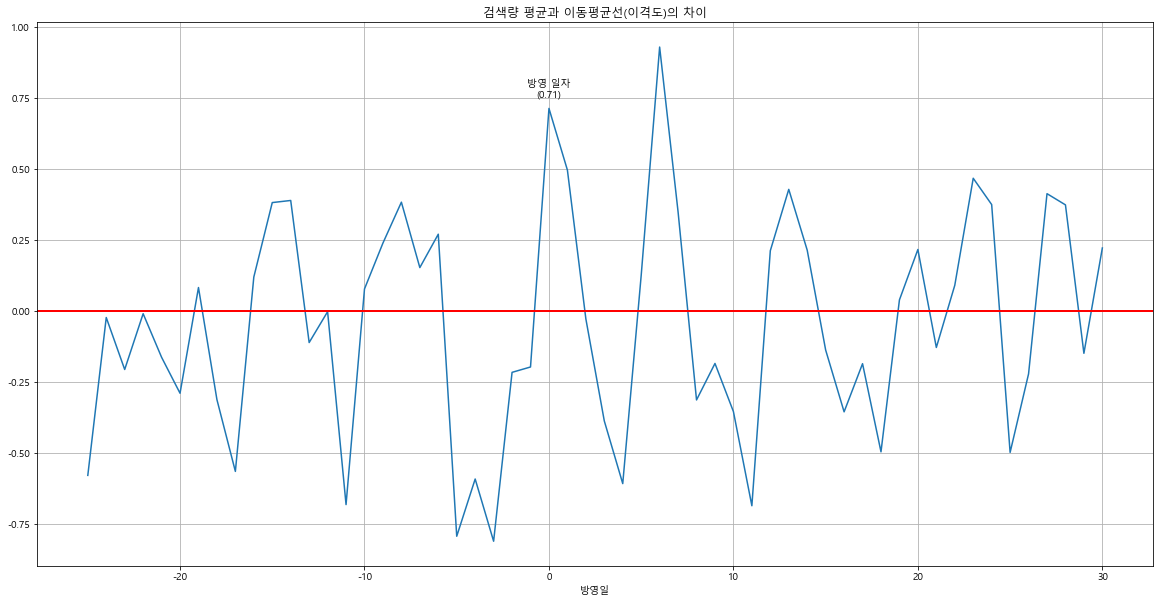

In [53]:
# 평균과 이격도의 차이
M_A = AP['Row_mean'] - AP['avg_5']

plt.figure(figsize=(20,10))
plt.title('검색량 평균과 이동평균선(이격도)의 차이')

plt.plot(AP['Row_mean'] - AP['avg_5'])
plt.axhline(y=0, color='r', linewidth=2)

plt.xlabel('방영일')
plt.annotate('방영 일자'+'\n'+'('+str('%.2f' % M_A[0])+')',
            xy =(0,M_A[0]+0.04),
            ha = 'center')

plt.grid(True)

plt.show()

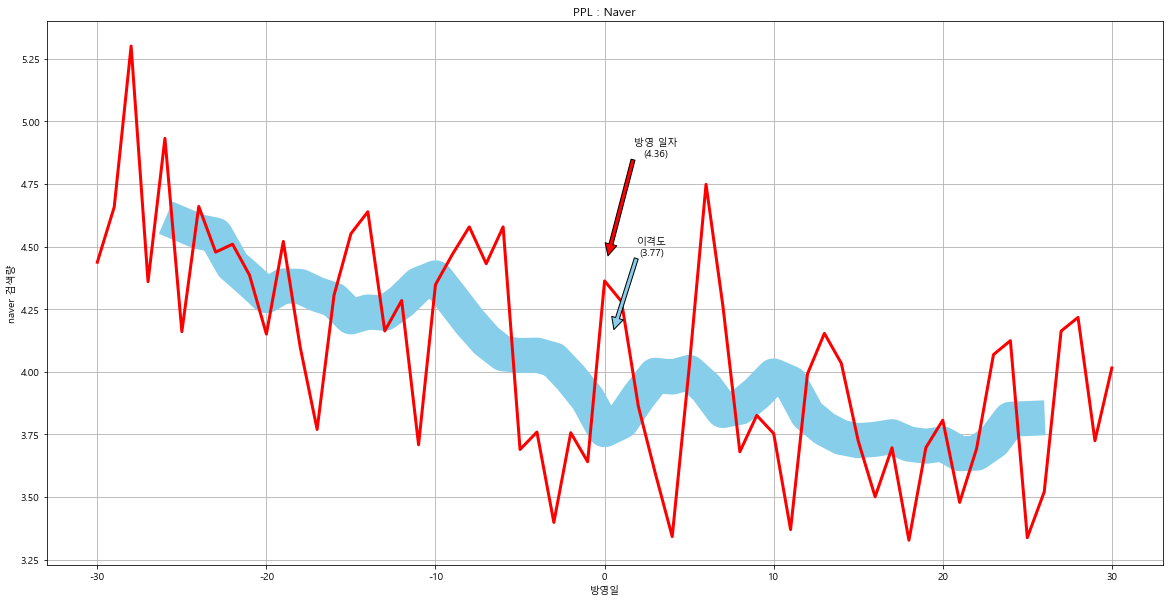

In [54]:
# avg_10


# plot 출력
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)


plt.plot(AP['Row_mean'])
ax.plot(AP.index, AP['avg_10'],linewidth=35,color='skyblue')
ax.plot(AP.index, AP['Row_mean'],linewidth=3,color='red')
plt.xlabel('방영일')
plt.ylabel('naver 검색량')
plt.title('PPL : Naver')
# annot : 'Row_mean'
plt.annotate('방영 일자'+'\n'+'('+str('%.2f' % AP['Row_mean'][0])+')',
            xy = (0+0.2, AP['Row_mean'][0]+0.1),
            xytext = (0+3, AP['Row_mean'][0]+0.5),
            ha = 'center',
            arrowprops={'facecolor' : 'red'}
            )
# annot : 'avg_10'
plt.annotate('이격도'+'\n'+'('+str('%.2f' % AP['avg_10'][0])+')',
            xy = (0+0.55, AP['avg_10'][0]+0.4),
            xytext = (0+2.8, AP['avg_10'][0]+0.7),
            ha = 'center',
            arrowprops={'facecolor' : 'skyblue'}
            )
plt.grid(True)

plt.show()

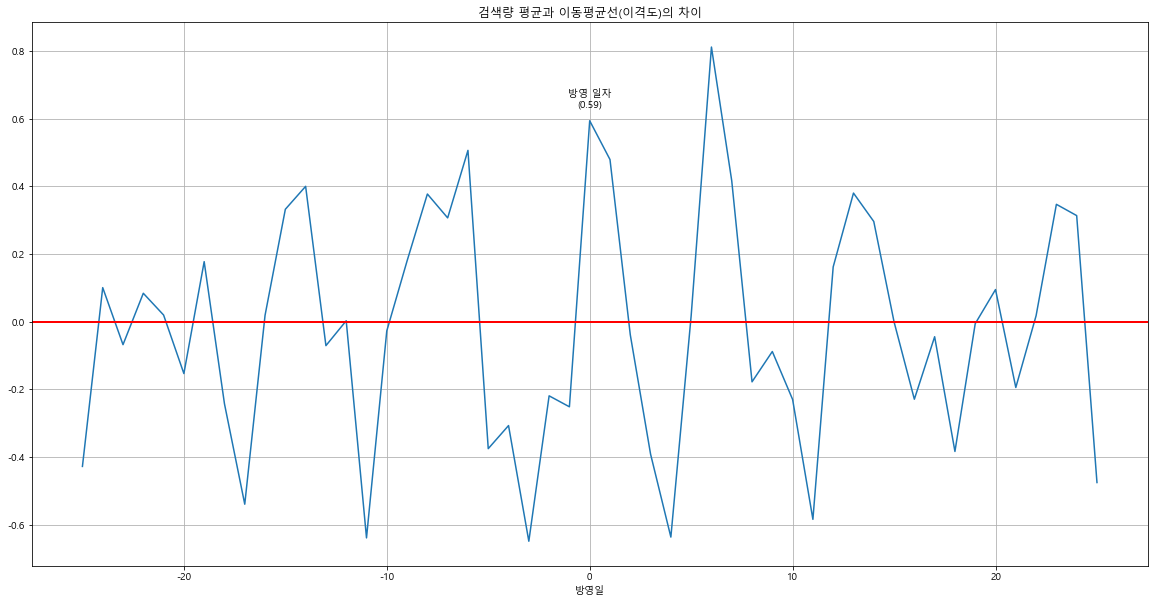

In [55]:
# 평균과 이격도의 차이
M_A = AP['Row_mean'] - AP['avg_10']

plt.figure(figsize=(20,10))
plt.title('검색량 평균과 이동평균선(이격도)의 차이')

plt.plot(AP['Row_mean'] - AP['avg_10'])
plt.axhline(y=0, color='r', linewidth=2)

plt.xlabel('방영일')
plt.annotate('방영 일자'+'\n'+'('+str('%.2f' % M_A[0])+')',
            xy =(0,M_A[0]+0.04),
            ha = 'center')

plt.grid(True)

plt.show()

# 결론 ( 상품명 )

  
분석결과, 간접광고(PPL)는 Naver의 검색량에 영향을 주었다.  
영향 측정은 간접광고 방영 전후 30일전, 당일, 30일후로 나누어  
모든 품목들의 해당일자의 '평균치(['Row_mean'])'를 만들었고,  
'평균치'가 유의미한지 추세를 제공하는지 알아보기 위해 '이격도(['avg_5'],['avg_10'])'를 사용하였다.  
이동평균선의 '이격도'는 '평균치'의 5일(x-5), 10일(x-5,x+5)간의 평균으로 제작하였다.
  
위의 분석을 통해서  
간접광고가 상품명의 검색에는 영향력이 유의미하지 않았다.

# 최종 결론
    
PPL의 영향력을 네이버 검색량으로 검증.  
* 분포적 특성에대해 정규분포와 2시그마 법칙으로 검증 해보았을 때,
정규분포에 가까운 분포를 가지고 있다고 볼 수 있었다.

- 시계열적 특성에대한 분석(이동평균선)
1. 브랜드이름, 품목으로 검색  
2. 상품명으로 검색  
  
공통적으로 두 모델 모두 방영 당일의 이격도에 대해서  
적으로 두 모델 모두 방영 당일의 이격도에 대해서  
상승세를 보이므로 __***PPL이 Naver의 검색량에 영향력이 있음을 알수있다.***__

---
하지만 '1.'과 '2.'로 나누어서 분석해본 결과가 같은 단위기간임을 감안했을 때,  
검색 수단으로 '정확한 상품명'을 검색하기 보다는  
그 브랜드명, 혹은 품목을 검색하는 경우가 많았다고 볼 수 있다.
  
  
'해당 분석'에서 알 수 없는 다른 요인에 의한 검색량 상승세('1.'과 '2.'에서)와  
PPL의 영향력(방영당일 상승폭)에 대해서 비교 해봤을 때,  
효과적인 간접광고를 위해서는 '브랜드 노출'이 중요하다는 것을 알 수 있다.
